<a href="https://colab.research.google.com/github/Chandu9391/Data-science-codes/blob/main/logistic_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
claimants = pd.read_csv("/content/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
claimants.drop(['CASENUM'],inplace=True,axis=1)

In [ ]:
display(claimants.head(),claimants.shape)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


(1340, 6)

In [ ]:
claimants = claimants.dropna()

In [ ]:
claimants.shape

(1096, 6)

In [ ]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [ ]:
x = claimants.iloc[:,1:]


In [ ]:
x.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [ ]:
y = claimants.iloc[:,0]

In [ ]:
y.head()

,ATTORNEY
0,0
1,1
2,1
3,0
4,1


In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(x,y)

LogisticRegression()

In [ ]:
y_pred = model.predict(x)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y.head()

,ATTORNEY
0,0
1,1
2,1
3,0
4,1


In [ ]:
y_pred_df = pd.DataFrame({'acutal' : y,'predicted' : y_pred})

In [ ]:
y_pred_df

,acutal,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf = confusion_matrix(y,y_pred)

In [ ]:
conf

array([[381, 197],
       [123, 395]])

In [ ]:
a = (381+395)/(381+197+123+395)
a

0.708029197080292

In [ ]:
a*100

70.8029197080292

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.708029197080292

In [ ]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.6672297297297297

In [ ]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.7625482625482626

In [ ]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.7117117117117118

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
auc = roc_auc_score(y,y_pred)

In [ ]:
auc

0.7108589063606365

In [ ]:
model.predict_proba(x)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [ ]:
fpr , tpr , thresholds = roc_curve(y , model.predict_proba(x)[:,1])

In [ ]:
fpr.shape

(446,)

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

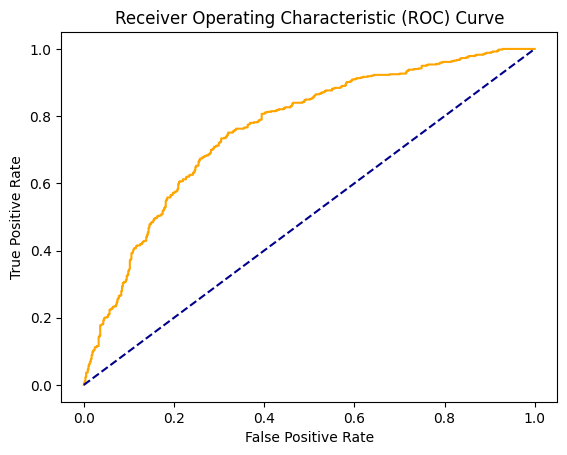

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

In [ ]:
from pickle import dump
a = dump(model,open('claimants.pkl','wb'))

In [ ]:
a